In [223]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [224]:
data_dir = "./data"

In [225]:
data = pd.read_json(os.path.join(data_dir, "dessert.json"))

## Data inspection

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            392 non-null    int64 
 1   description   392 non-null    object
 2   tags          392 non-null    object
 3   manufacturer  254 non-null    object
 4   type          390 non-null    object
 5   portions      392 non-null    object
 6   nutrients     392 non-null    object
dtypes: int64(1), object(6)
memory usage: 21.6+ KB


In [227]:
data.isnull().sum()

id                0
description       0
tags              0
manufacturer    138
type              2
portions          0
nutrients         0
dtype: int64

In [228]:
data.shape

(392, 7)

In [229]:
data.columns

Index(['id', 'description', 'tags', 'manufacturer', 'type', 'portions',
       'nutrients'],
      dtype='object')

In [230]:
data.head()

,id,description,tags,manufacturer,type,portions,nutrients
0,18011,"Biscuits, plain or buttermilk, dry mix, prepared",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
1,18012,"Biscuits, plain or buttermilk, refrigerated do...",[],,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
2,18013,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
3,18014,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
4,18015,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


In [231]:
# set index because there is already a valid id
data = data.set_index("id")
data.head()

,description,tags,manufacturer,type,portions,nutrients
id,,,,,,
18011,"Biscuits, plain or buttermilk, dry mix, prepared",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
18012,"Biscuits, plain or buttermilk, refrigerated do...",[],,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
18013,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
18014,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
18015,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


## Exercise 1

### 1 a)

In [232]:
#Check for empty values in the manufacturer column
(data["manufacturer"] == "").sum()

173

In [233]:
#Transform empty type values of manufacturer to None
data.loc[data.manufacturer == "", "manufacturer"] = None
(data["manufacturer"] == "").sum()

0

In [234]:
#Check values in the type column
data.type.value_counts()

Cake                108
Cookies              86
Sweet Bread          61
Savory Bread         41
Toaster Pastries     25
Biscuits             24
Muffins              17
Sweet bread           9
Puff Pastry           5
Sweet Breads          3
Cream Puff            3
Coookies              2
Biscuit               1
Muesli                1
Savory bread          1
Muffin                1
sweet bread           1
Cookie                1
Name: type, dtype: int64

In [235]:
#transform troublesome type values
data.loc[data.type.isin(["Coookies", "Cookie"]), "type"] = "Cookies"
data.loc[data.type.isin(["Sweet bread", "sweet bread", "Sweet Breads"]), "type"] = "Sweet Bread"
data.loc[data.type == "Savory bread", "type"] = "Savory Bread"
data.loc[data.type == "Biscuit", "type"] = "Biscuits"
data.loc[data.type == "Muffin", "type"] = "Muffins"

In [236]:
data.type.value_counts()

Cake                108
Cookies              89
Sweet Bread          74
Savory Bread         42
Biscuits             25
Toaster Pastries     25
Muffins              18
Puff Pastry           5
Cream Puff            3
Muesli                1
Name: type, dtype: int64

In [237]:
#Check values in the tags column
data.tags.value_counts()

[]                               388
[Latino food]                      2
[Include commodity code B367]      1
[Include commodity code B368]      1
Name: tags, dtype: int64

In [238]:
# drop the column "tags" because because it contains too little information (just 4 entries)
data = data.drop('tags', axis=1)
data.head()

,description,manufacturer,type,portions,nutrients
id,,,,,
18011,"Biscuits, plain or buttermilk, dry mix, prepared",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
18012,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
18013,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
18014,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
18015,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


In [239]:
#Look for empty values in type
for value in data["type"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string
    

None: Missing
None: Missing


In [240]:
# look at data with type None
data.loc[data["type"].isnull()]

,description,manufacturer,type,portions,nutrients
id,,,,,
18048,Raisin bread (toasted),None,None,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 8.6, 'units': 'g', 'description': '..."
18642,"GENERAL MILLS, BETTY CROCKER SUPERMOIST Yellow...",General Mills Inc.,None,"[{'amount': 1, 'unit': 'serving', 'grams': 43.0}]","[{'value': 3.8, 'units': 'g', 'description': '..."


In [241]:
print(data.at[18048,"description"])

Raisin bread (toasted)


In [242]:
print(data.at[18642,"description"])

GENERAL MILLS, BETTY CROCKER SUPERMOIST Yellow Cake Mix, dry


In [243]:
# Set missing type for empty type values
data.at[18048,"type"] = "Sweet Bread"
data.at[18642,"type"] = "Cake"

In [244]:
#Look for empty values in nutrients
for value in data["nutrients"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [245]:
#Look for empty values in portions
for value in data["portions"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

[]: Empty value ([])
[]: Empty value ([])
[]: Empty value ([])
[]: Empty value ([])


In [246]:
#Look for empty values in description
for value in data["description"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [247]:
 #Look for empty values in id
for value in data.index:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [248]:
data.sample(20, random_state=1)

,description,manufacturer,type,portions,nutrients
id,,,,,
18133,"Cake, sponge, commercially prepared",None,Cake,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 5.4, 'units': 'g', 'description': '..."
18258,"English muffins, plain, enriched, with ca prop...",None,Savory Bread,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 8.87, 'units': 'g', 'description': ..."
18563,"ARCHWAY Home Style Cookies, Gourmet Rocky Road",Archway Cookies,Cookies,"[{'amount': 1, 'unit': 'serving', 'grams': 28.0}]","[{'value': 4.86, 'units': 'g', 'description': ..."
18188,"Cookies, peanut butter, refrigerated dough, baked",None,Cookies,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 9.1, 'units': 'g', 'description': '..."
18938,"Toaster Pastries, fruit, frosted (include appl...",None,Toaster Pastries,"[{'amount': 1, 'unit': 'pastry', 'grams': 55.0...","[{'value': 4.23, 'units': 'g', 'description': ..."
18363,"Tortillas, ready-to-bake or -fry, corn",None,Savory Bread,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 5.7, 'units': 'g', 'description': '..."
18127,"Cake, snack cakes, creme-filled, chocolate wit...",None,Cake,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 3.63, 'units': 'g', 'description': ..."
18148,"Cheesecake prepared from mix, no-bake type",None,Cake,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 5.5, 'units': 'g', 'description': '..."
18131,"Cake, white, dry mix, special dietary (include...",None,Cake,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 3.0, 'units': 'g', 'description': '..."


### 1 b)

In [249]:
data.type.value_counts()

Cake                109
Cookies              89
Sweet Bread          75
Savory Bread         42
Biscuits             25
Toaster Pastries     25
Muffins              18
Puff Pastry           5
Cream Puff            3
Muesli                1
Name: type, dtype: int64

### 1 c)

In [250]:
list = []
for index, row in data.iterrows():
    for x in row['nutrients']:
        if x["type"] == "Vitamins":   
            list.append([index, row["type"], x["description"], x["value"], x["units"]])
    

In [251]:
print(list)

[[18011, 'Biscuits', 'Vitamin A, IU', 999, 'IU'], [18011, 'Biscuits', 'Retinol', 25.0, 'mcg'], [18011, 'Biscuits', 'Vitamin A, RAE', 26.0, 'mcg_RAE'], [18011, 'Biscuits', 'Vitamin C, total ascorbic acid', 0.4, 'mg'], [18011, 'Biscuits', 'Thiamin', 0.35000000000000003, 'mg'], [18011, 'Biscuits', 'Riboflavin', 0.357, 'mg'], [18011, 'Biscuits', 'Niacin', 3.021, 'mg'], [18011, 'Biscuits', 'Pantothenic acid', 0.548, 'mg'], [18011, 'Biscuits', 'Vitamin B-6', 0.068, 'mg'], [18011, 'Biscuits', 'Folate, total', 52.0, 'mcg'], [18011, 'Biscuits', 'Vitamin B-12', 0.21, 'mcg'], [18011, 'Biscuits', 'Folic acid', 46.0, 'mcg'], [18011, 'Biscuits', 'Folate, food', 6.0, 'mcg'], [18011, 'Biscuits', 'Folate, DFE', 84.0, 'mcg_DFE'], [18012, 'Biscuits', 'Vitamin A, IU', 0.0, 'IU'], [18012, 'Biscuits', 'Retinol', 0.0, 'mcg'], [18012, 'Biscuits', 'Vitamin A, RAE', 0.0, 'mcg_RAE'], [18012, 'Biscuits', 'Carotene, beta', 0.0, 'mcg'], [18012, 'Biscuits', 'Carotene, alpha', 0.0, 'mcg'], [18012, 'Biscuits', 'Vitami

In [252]:
df = pd.DataFrame (list, columns = ['index', 'type', 'Vitamin', 'value', 'units'])

In [253]:
df.units.value_counts()

mcg        3082
mg         2800
IU          538
mcg_RAE     316
mcg_DFE     308
Name: units, dtype: int64

In [254]:
# convert mcg to mg
df.loc[df.units == "mcg", "value"] = df.value*0.001
df.loc[df.units == "mcg", "units"] = "mg"

In [255]:
# just use mg units because other units are not comparable
df = df[(df['units'] == "mg")]

In [256]:
df.units.value_counts()

mg    5882
Name: units, dtype: int64

In [257]:
df.Vitamin.value_counts()

Thiamin                           375
Riboflavin                        375
Niacin                            375
Folate, total                     372
Vitamin C, total ascorbic acid    358
Vitamin B-6                       338
Pantothenic acid                  333
Vitamin B-12                      333
Folate, food                      326
Folic acid                        308
Retinol                           296
Carotene, beta                    186
Vitamin E (alpha-tocopherol)      186
Vitamin K (phylloquinone)         186
Choline, total                    180
Carotene, alpha                   177
Cryptoxanthin, beta               177
Lycopene                          177
Lutein + zeaxanthin               175
Vitamin E, added                  170
Vitamin B-12, added               169
Vitamin D (D2 + D3)               164
Tocopherol, beta                   28
Tocopherol, gamma                  28
Tocopherol, delta                  28
Betaine                            26
Dihydrophyll

In [258]:
types = []
means = []
for i in data.type.unique():
    types.append(i)
    means.append(df[(df['type'] == i)]["value"].mean())

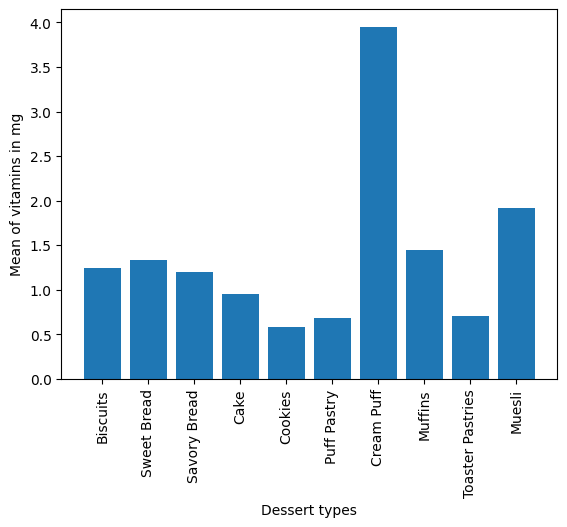

In [259]:
plt.bar(types, means)
plt.xlabel('Dessert types')
plt.ylabel('Mean of vitamins in mg')
plt.xticks(rotation='vertical')
plt.show()